## CITS5508 Machine Learning 
**Student Name:** Varun Jain <br> 
**Student Number:** 21963986 <br> 
**Due Date:** 2nd April 2021

In [3]:
import pandas as pd 
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_predict
from pandas.plotting import scatter_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# Project 1

## Task 1

Upon visualisation of the dataframe, we cab observe that the ecoli data is quite difficult to read but also are missing the header columns for each respective columns. 

In [4]:
ecoli_readCSV = pd.read_csv('ecoli.data','\s+', names = ["Sequence Name","mcg","gvh","lip","chg","aac","alm1","alm2", "class"])

### Exploratory Analysis

In [5]:
#overall description of the attribes datatype and non-null values 
ecoli_readCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sequence Name  336 non-null    object 
 1   mcg            336 non-null    float64
 2   gvh            336 non-null    float64
 3   lip            336 non-null    float64
 4   chg            336 non-null    float64
 5   aac            336 non-null    float64
 6   alm1           336 non-null    float64
 7   alm2           336 non-null    float64
 8   class          336 non-null    object 
dtypes: float64(7), object(2)
memory usage: 23.8+ KB


In [6]:
#returns the count for each insatnce in Sequence Name Attribute
ecoli_readCSV['Sequence Name'].value_counts()

OMPC_ECOLI    1
FES_ECOLI     1
CHEY_ECOLI    1
CHEB_ECOLI    1
ILVY_ECOLI    1
             ..
POTF_ECOLI    1
OTC1_ECOLI    1
PHOR_ECOLI    1
UHPB_ECOLI    1
RHAS_ECOLI    1
Name: Sequence Name, Length: 336, dtype: int64

In [7]:
#returns the count for each instance in the Class Attribute 
ecoli_readCSV['class'].value_counts()

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: class, dtype: int64

We observe that the ecoli data has 336 non-null values columns with seven features, one class and one identifier, Sequence Names. In the class **class**, we observe that the following classes have less than 10 instances, **oml, iml, imS**. We need to remove all the classes with instances less than 10 instances as it is not possible to classify them.

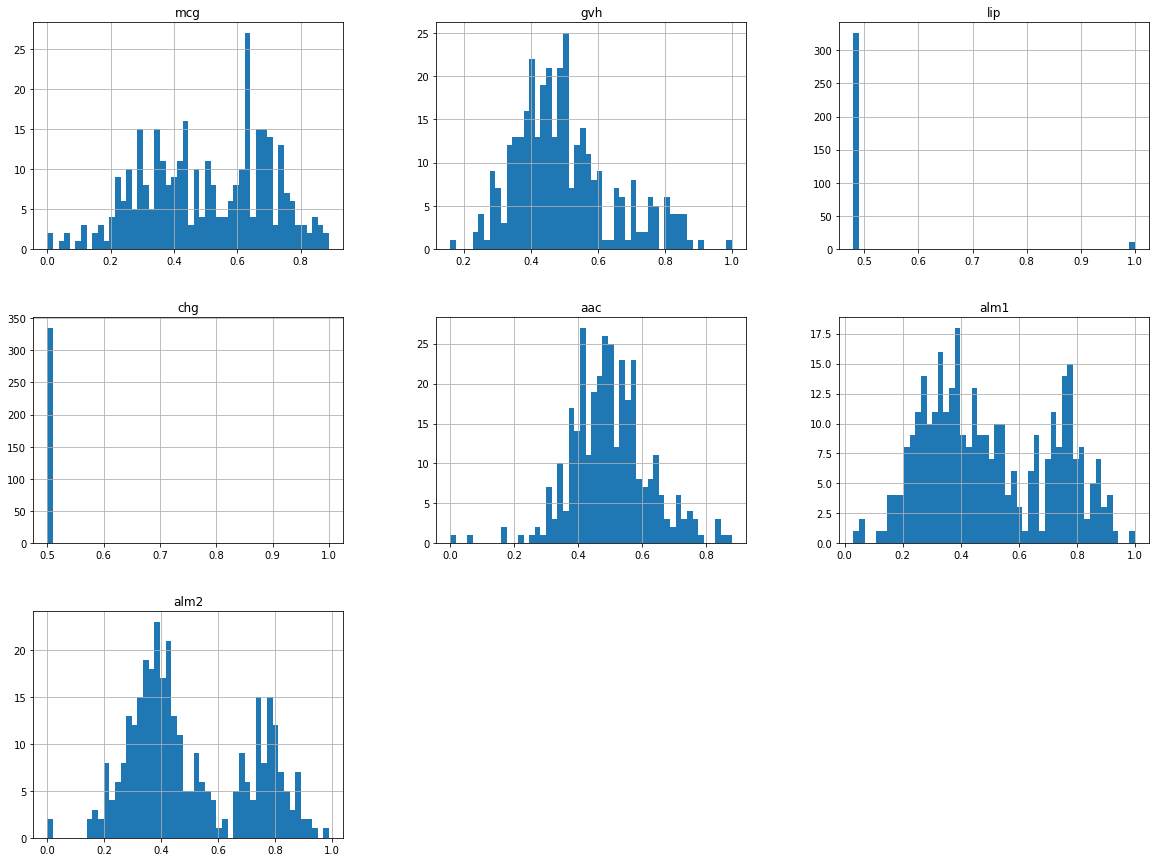

In [8]:
%matplotlib inline 
ecoli_readCSV.hist(bins=50, figsize=(20,15)) 
plt.show()

From the above plot, we can observe that:
- Most attributes are fairly normally distributed with each attribute having either one peak or two. 
- The scale for all the histogram plots are the same from [0,1)
- For attributes **chg** and **lip**, almost all the instances are allocated to the one slot

### Data Cleaning

Eliminates the rows with the specified target values. So from the class **class** the following values **oml, iml, imS** will be omitted from the table with its respective row. 

In [9]:
#eliminate the entire row based on a certain value
def drop_row(column, target=[]):
    global ecoli_readCSV
    #looping through the list and skipping all the rows based on a certain row value in column
    for x in target:
        ecoli_readCSV = ecoli_readCSV[ecoli_readCSV[column] != x]
    return ecoli_readCSV 

#the columns that we want to remove
target_list = ['omL', 'imS', 'imL']
ecoli_processed = drop_row('class', target_list)

Eliminates the column **Sequence Name** as it only contains unique values, so it is not possible to classify them



In [10]:
#drop the entire column in the dataframe ecoli 
def drop_column(column_name):
    return ecoli_processed.drop(column_name, axis = 'columns')

ecoli_processed = drop_column('Sequence Name')

### Data Preprocessing

#### Target and Response Variable

Split the dataframe into seperate categories, response and target. The response variable contains the dependent variables (all the numerical attributes) and the target variable contains the class attribute.

In [11]:
#Stores all the columns except the Class columns
x = ecoli_processed.drop("class", axis = 1)
#stores the Class columns only
y = ecoli_processed["class"].copy()

#### Feature Scaling

Most numerical attributes in the dataset are fairly well normalised however lets see if there is any affect when we scale the ecoli dataset. To standardise the data, we are going to use a feature scaling method called **Standardization**. 

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Task 2

### Classification

We are going to train the data with Decision Tree Classifers. The first decision tree classifier will be trained on raw unscaled attribute and the second decision tree classifier will be training on scaled attributes. The dataset will be scaled using a feature scaling method called StandardScaler. We are going to perform the classification task on the **class** attribute. 

For the multiclassification task, we are going to use the decisiontreeclasifier() with the following hyperparameters to evalute our model on raw unscaled data. Out of the four hyperparamters, the following three: **criterion, max_depth and min_samples_leafs**, are considered:

Hyperparameters:  
- **criterion:** meausres the quality of the split, by using a either entropy measure or gini impurity. 
- **max_depth:** used to restrict the decision trees freedom in order to avoid overfitting. 
- **min_samples_leafs:** regularizes the model and states the lowest possible number of samples a leaf node can have.

Now, we are going to build a model in regards to GridSearchCV with the hyperparameters stated above. 

#### Grid Search Parameters

params stores the hyperparameters and its values, that will be passed to the GridSearchCV for the two decision trees that will be implemented below. 

In [13]:
params = [{
    'criterion':['gini','entropy'],
    'max_depth':[1,3,5],
    'min_samples_leaf':[5,7,9]}]

decisionTree_model = DecisionTreeClassifier(random_state = 42)

#### Decision Tree Classifer with Unscaled Data

Find the best estimators, we pass the following arguments: **Decision Tree Model, parameter values and the number of folds** through the GridSearchCV. 

In [14]:
decisionTree_raw_GridCV = GridSearchCV(decisionTree_model, params, cv = 3, scoring='f1_macro',return_train_score=True)

In [15]:
decisionTree_raw_GridCV.fit(x, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 3, 5],
                          'min_samples_leaf': [5, 7, 9]}],
             return_train_score=True, scoring='f1_macro')

In [16]:
#returns the best parameters for the DT Classifier
decisionTree_raw_GridCV.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7}

In [17]:
#returns the best score for the DT Classifier
decisionTree_raw_GridCV.best_score_

0.7935288119593795

In [18]:
#recompute the DT Classifers but with the best results 
best_tree_clf = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=7,random_state=42)

In [19]:
#fit the model 
best_tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=42)

In [20]:
#cross validation
y_raw_pred = cross_val_predict(best_tree_clf, x,y, cv=3)

In [21]:
conf_mx = confusion_matrix(y, y_raw_pred)

In [22]:
conf_mx

array([[139,   0,   0,   0,   4],
       [  3,  63,  11,   0,   0],
       [  1,  11,  23,   0,   0],
       [  2,   1,   1,  13,   3],
       [  5,   5,   1,   1,  40]])

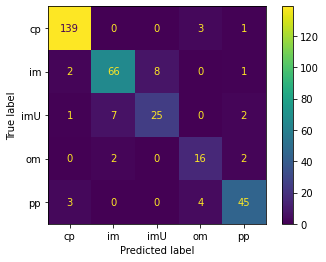

In [23]:
plot_confusion_matrix(best_tree_clf, x, y)

#### Confusion Matrix 


The way confusion matrix and plot_confusion_matrix plot the confusion matrix produce different results. This is due to the fact that the way the two confusion matrix computes the input, however they both have similar output which are relatively close to one another. 

As for better visualisation purposes, lets use the heatmap confusion matrix. **CP** has the highest number of instances that got correctly identified by the models, followed by **im** and **pp**. We also notice that the highest rate of misclassification belongs to the **im** with **imU** attribute.

#### Decision Tree Classifer with Scaled Data

In [24]:
decisionTree_scaled_GridCV = GridSearchCV(decisionTree_model, params, cv = 3, scoring='f1_macro',return_train_score=True)

In [25]:
decisionTree_scaled_GridCV.fit(x_scaled, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 3, 5],
                          'min_samples_leaf': [5, 7, 9]}],
             return_train_score=True, scoring='f1_macro')

In [26]:
#returns the best parameters for the DT Classifier
decisionTree_scaled_GridCV.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7}

In [27]:
#returns the best score for the DT Classifier
decisionTree_scaled_GridCV.best_score_

0.7830251272018091

In [28]:
#recompute the DT Classifers but with the best results 
best_scaled_tree_clf = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=7,random_state=42)

In [29]:
#fit the model 
best_scaled_tree_clf.fit(x_scaled, y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=42)

In [30]:
#cross validation
y_scaled_pred = cross_val_predict(best_tree_clf, x_scaled,y, cv=3)

In [31]:
conf_mx = confusion_matrix(y, y_scaled_pred)
conf_mx

array([[137,   0,   0,   0,   6],
       [  2,  64,  11,   0,   0],
       [  1,  11,  23,   0,   0],
       [  2,   2,   1,  12,   3],
       [  5,   5,   1,   1,  40]])

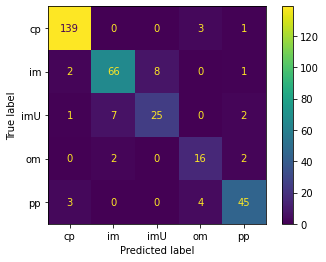

In [32]:
plot_confusion_matrix(best_scaled_tree_clf, x_scaled, y)

#### Confusion Matrix 


The way confusion matrix and plot_confusion_matrix plot the confusion matrix produce different results. This is due to the fact that the way the two confusion matrix computes the input, however they both have similar output which are relatively close to one another. 

As for better visualisation purposes, lets use the heatmap confusion matrix. **CP** has the highest number of instances that got correctly identified by the models, followed by **im** and **pp**. We also notice that the highest rate of misclassification belongs to the **im** with the **imU** attribute.


## Task 3

#### Model Evualation - Weight Score 

The below model computes for the weight f1 score for both the scaled and unscaled data. Overall we can observe that the when the decision tree classifier is trained using the unscaled raw data, it performs better but the difference between the f1 scores are insignificant. Both DT classifers weighted average is around the 79% mark indicates that the model is moderatly accurate when it comes to classifiy instances to their correct class. 

In [33]:
print('f1 score for unscaled raw data is:', f1_score(y, y_raw_pred, average='macro'))
print('f1 score for scaled raw data is:', f1_score(y, y_scaled_pred, average='macro'))

f1 score for unscaled raw data is: 0.7944054491657802
f1 score for scaled raw data is: 0.7834196583769918


#### Model Evualation - Confusion Matrix 

In both of the confusion matrix heatmap for the two decision tree classifers, we can observe that the two confusion matrix's are the same. This indicates that the dataset is unphased when it is scaled meaning scaling has no impact on the classification rate on the trained model. The reason for the misclassifcation in both classifers, is due to the imbalanced dataset resulting in a high number of instances being classied as im over imU. 

# Project 2

## Task 1

In [34]:
concreteSlump_readCSV = pd.read_csv('slump_test.data',',')

### Exploratory Analysis

In [35]:
concreteSlump_readCSV.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [36]:
concreteSlump_readCSV.shape

(103, 11)

In [37]:
concreteSlump_readCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

The **Concrete Slump** dataset contains 103 instances with 11 distinct attributes. As mention by the lab sheet, there are seven input variables, and 3 output variables, **SLUMP, FLOW, 28-day Compressive Strength**. All of the attributes are numerical with a float64 datatype except attribye **No**.

In this project, we will only use 7 of the 11 input attributes to predict the outcome column, **28-day Compressive Strength (MPa)**. Plotting all 11 attributes is not reasonable, so we will select six interesting features and plot a visualisation for the unscaled Concrete Slump dataset. 

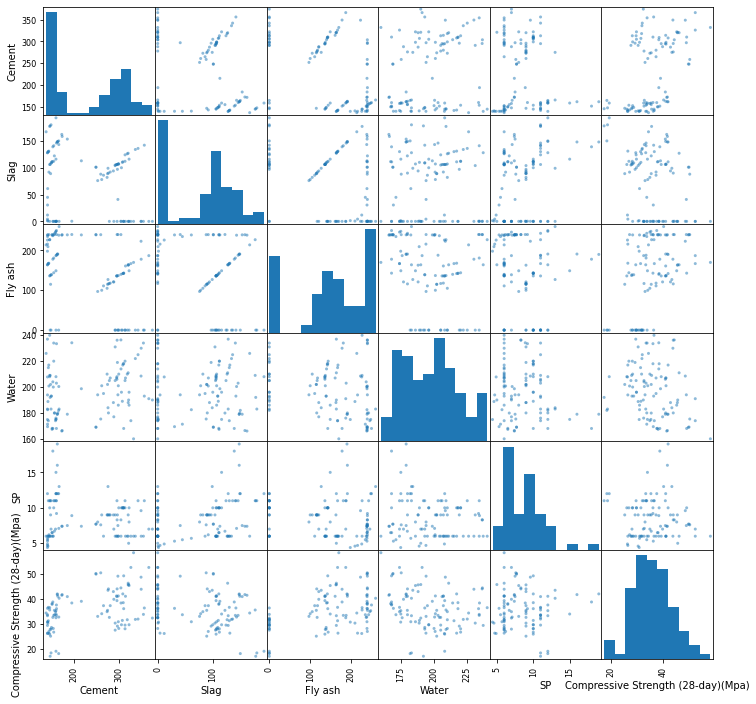

In [38]:
features = ["Cement","Slag","Fly ash","Water","SP","Compressive Strength (28-day)(Mpa)"]

scatter_matrix(concreteSlump_readCSV[features], figsize=(12,12));

In the scatter matrix shown above, we observe that:
- Slag and Fly ash are fairly strongly correlated together. 
- Slag and Cement are moderatly correlated together.
- Fly ash and Cement are moderatly correlated together. 
- The Compressive Strength seems faily uncorrelated with the input variables, as it is met with clusters. 
- The histogam for each attribute is either distributed to the left or right, except water. Compressive Strength is slighlty tilted to the left. 

In [39]:
corr_matrix_2 = concreteSlump_readCSV.corr()
corr_matrix_2["Compressive Strength (28-day)(Mpa)"].sort_values(ascending=False)

Compressive Strength (28-day)(Mpa)    1.000000
Cement                                0.445725
Fly ash                               0.444393
No                                    0.186274
SP                                   -0.037871
FLOW(cm)                             -0.124029
Fine Aggr.                           -0.154484
Coarse Aggr.                         -0.160684
SLUMP(cm)                            -0.223358
Water                                -0.254235
Slag                                 -0.331588
Name: Compressive Strength (28-day)(Mpa), dtype: float64

### Data Cleaning

Since **Compressive Strength (28-days)(Mpa)** is the only output attribute to be predicted, remove SLUMP and FLOW from the dataset as we will be doing any predictions on them. Drop the **No** column, as it only contains unique integors and will not aid in out model predictions and evaluations. 

In [40]:
#drop the entire column in the dataframe ecoli 
def drop_column(column_name = []):
    global concreteSlump_readCSV
    for x in column_name:
        concreteSlump_readCSV = concreteSlump_readCSV.drop(x, axis = 'columns')
    return concreteSlump_readCSV

columns = ['No', 'SLUMP(cm)', 'FLOW(cm)']
concreteSlump_processed = drop_column(columns)

### Data Preprocessing

In [41]:
y_2 = concreteSlump_processed['Compressive Strength (28-day)(Mpa)'].copy()
x_2 = concreteSlump_processed.drop('Compressive Strength (28-day)(Mpa)', axis = 1) 

### Feature Scaling

In [42]:
scaler = StandardScaler()
x_scaled_2 = scaler.fit_transform(x_2)

## Task 2

### Model Training 

In project 2, we will be using two linear regression models, Decision Tree Regression and Support Vector Regression. Both Regression models will predicts values for the Compressive Strength (28-day)(Mpa) attribute. Decision Tree Regressior will be trained on both the raw and scaled dataset, while the SVR will only be trained on the scaled dataset. 

The Decision Tree Regressors will have their **criterion** set to **mse** and will use GridSearchCV to identify the best estimators for the regressor models that produce optimal values. 

For the **Support Vector Regressior Hyperparameters**: 
- **random_state = 42:** sets the seed the 42 and ensures that the svc classifier picks similar random instances to ensure accurate results for the same instances. 
- **Kernal:** refers to the type of kernal used. This includes rbf, linear, poly, and sigmoid. 
- **C:** is a Regularization parameter. C represents an error term which shows the tradeoff between the decision boundary and misclassification term. 
- **Gamma:** only used for the rbf kernal. Gamma impacts the curvature of the decision boundary. 

For the **Decision Tree Regressors**:
- **criterion:** the criterion for the two DT Regressors are set to MSE. 
- **max_depth:** used to restrict the decision trees freedom in order to avoid overfitting. 
- **min_samples_leafs:** regularizes the model and states the lowest possible number of samples a leaf node can have.

#### Parameter Tuning

The parameters that will be passed to the gridsearchCV, and tested against to find the best set of estimators. 

In [43]:
params_svr =  {'kernel': ['rbf','poly','sigmoid'], 
              'C': [1.0, 10, 100],  
              'gamma': ['scale', 'auto', 1]} 

In [44]:
param_dtr = [{
    'criterion': ["mse"],
    'max_depth': [4,7,10],
    'min_samples_leaf': [1, 5,10]}]

#### Best Parameters and MSE

the gridsearch() will model the Regression model against the training data and find the best parameters that find the optimal values. Within the same function, the cross value is predicted and used to calculate the mean square error value. 

In [45]:
def grid_search(regressor_model, response, target, cv, params = []):
    model = GridSearchCV(regressor_model, params, cv = cv, scoring = 'neg_mean_squared_error')
    model.fit(response,target)
    #stores the best parameters for the regression model 
    best_parameters = model.best_params_
    #computes cross validation
    target_predict = cross_val_predict(model, response, target, cv=cv)
    #computes mean squared error
    mse = mean_squared_error(target, target_predict)
    return best_parameters, target_predict, mse


#### Metrics for Model Evaluation

print the best parameters the model was trained against and its mse value. Also draws a graph where you can see the different between the predicated and actual values. 

In [46]:
def print_plot_results(name, best_parameters, target_predict, mse):
    print(f"Best Parameters for {name}: {best_parameters}")
    print(f"The best MSE Score for {name}: {mse}") 
    plt.plot(y_2, y_2, 'b')
    plt.scatter(target_predict, y_2, edgecolor="black", c="orange")

### Regression Model Training and Evaluation

For all three models below, the blue line represents the actual value and the orange line represents the predict values. 

#### Decision Tree Regresson with Unscaled Data

In [47]:
best_param_unscaled_dtr, target_predict_unscaled_dtr, mse_unscaled_dtr = grid_search(DecisionTreeRegressor(), x_2,y_2, 3, param_dtr)

Best Parameters for Unscaled DTR: {'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 5}
The best MSE Score for Unscaled DTR: 26.77117777041016


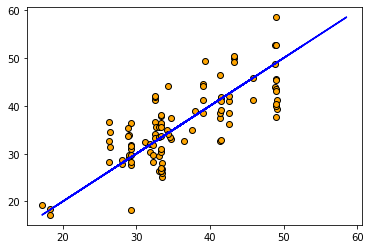

In [48]:
print_plot_results('Unscaled DTR', best_param_unscaled_dtr, target_predict_unscaled_dtr, mse_unscaled_dtr)

#### Decision Tree Regression with Scaled Data

Best Parameters for Scaled STR: {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 5}
The best MSE Score for Scaled STR: 26.418747740744564


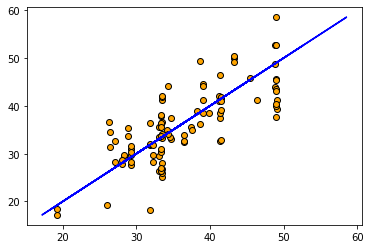

In [49]:
best_param_scaled_dtr, target_predict_scaled_dtr, mse_scaled_dtr = grid_search(DecisionTreeRegressor(), x_scaled_2,y_2, 3, param_dtr)
print_plot_results('Scaled STR', best_param_scaled_dtr, target_predict_scaled_dtr, mse_scaled_dtr)

#### Support Vector Regression Model 

Best Parameters for SVR: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
The best MSE Score for SVR: 5.441373413157398


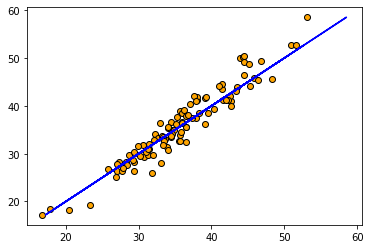

In [50]:
best_param_SVR, target_predict_SVR, mse_SVR = grid_search(SVR(), x_scaled_2,y_2, 3, params_svr)
print_plot_results('SVR', best_param_SVR, target_predict_SVR, mse_SVR)

## Task 3

### Comparsions

When we trained Decision Tree Regressor with both the scaled and unscaled dataset, we observe that the MSE value seems to be quite unaffected whether the dataset is scaled or not, for both DT regression models. Resulting in high MSE values for both regressors but differ by a neligable amount. We can conclude that the DT regression models are unaffected by scaling.

The predictor value points seem to be generalising towards a linear direction, in all three of the model. This can be seen on the graph above for each model where the predicting values and actual values have similar trends but vary in spread. We notice that the SVR Regressor Model out performs the DT Regressor quite significantly as the spread of the predicted values significantly much closer to the actual values, resulting in a lower MSE value. Whereas, in the Decision Tree Regressors, we observe that the predicated values deivate away more significantly from the actual line.

Also, this could indicate that SVR performs well on small datasets. The Concrete Slump, itself contains only 103 instances. However, it would be interesting to see whether we could achieve the same outcome as we have here, which could pontentially indicate that either Decision Tree Regressors are generally bad Regressor models or the size of the dataset indicates how well the DT regressor performs. 